In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ggplot import *
import numpy as np
np.set_printoptions(precision=4)
%matplotlib inline

In [2]:
X = pd.read_csv("features.csv", index_col=0)

In [3]:
X.head()

,x,y
0,4.953984,-1664.651926
1,5.216536,-5148.331727
2,5.700457,-485.462407
3,4.095386,3231.741201
4,7.474171,2919.845022


In [4]:
len(X)

10000

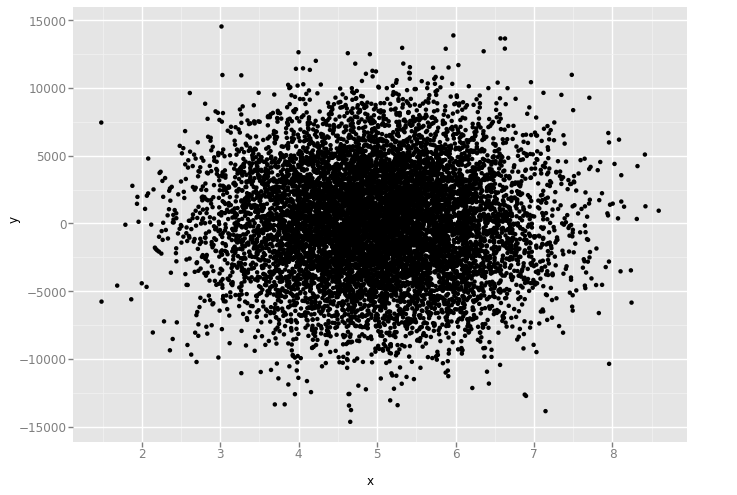

<ggplot: (-9223363245357605274)>

In [5]:
ggplot(aes(x="x", y="y"), data=X) + geom_point()

In [6]:
X.describe()

,x,y
count,10000.000000,10000.000000
mean,5.011605,-20.080900
std,1.004442,3994.613256
min,1.483836,-14635.924831
25%,4.332024,-2690.294554
50%,5.013214,-28.199242
75%,5.697293,2688.435004
max,8.589843,14528.703803


In [7]:
Y = pd.read_csv("targets.csv", index_col=0)
y1 = Y["t0"]
y2 = Y["target_1"]
y3 = Y["target_2"]

In [8]:
Y.head()

,t0,target_1,target_2
0,-0.046016,-0.462179,13.648960
1,0.216536,-1.070547,12.970487
2,0.700457,0.579091,15.696136
3,-0.904614,-0.096678,14.503406
4,2.474171,3.204133,22.094765


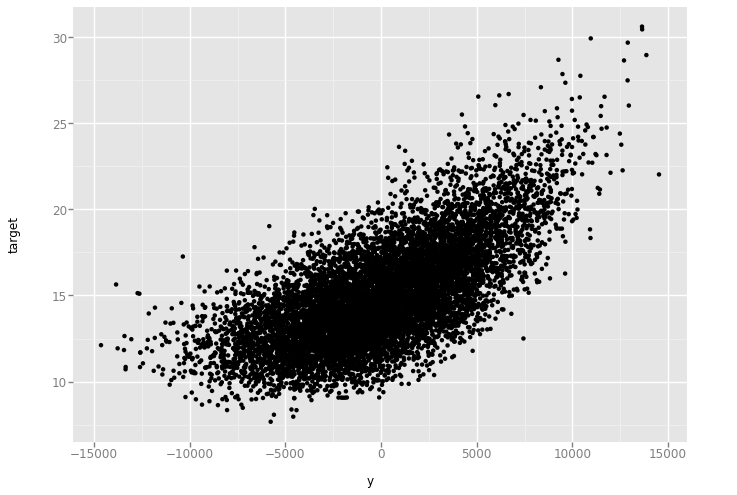

<ggplot: (-9223363245357826970)>

In [9]:
tmp = pd.DataFrame({"x":X["x"], "y":X["y"], "target":y3})
ggplot(aes(x="y", y="target"), data=tmp) + geom_point()

In [10]:
Xn = Normalizer().fit_transform(X)

In [11]:
pd.DataFrame(Xn).describe()

,0,1
count,10000.000000,10000.000000
mean,0.007526,-0.006646
std,0.040673,0.999172
min,0.000199,-1.000000
25%,0.001064,-0.999998
50%,0.001850,-0.984035
75%,0.003827,0.999998
max,1.000000,1.000000


In [12]:
Xn_poly = PolynomialFeatures().fit_transform(Xn)

In [13]:
X_poly = PolynomialFeatures(degree=4).fit_transform(X)

In [14]:
X_poly

array([[  1.0000e+00,   4.9540e+00,  -1.6647e+03, ...,   6.8007e+07,
         -2.2852e+10,   7.6788e+12],
       [  1.0000e+00,   5.2165e+00,  -5.1483e+03, ...,   7.2127e+08,
         -7.1184e+11,   7.0253e+14],
       [  1.0000e+00,   5.7005e+00,  -4.8546e+02, ...,   7.6583e+06,
         -6.5219e+08,   5.5542e+10],
       ..., 
       [  1.0000e+00,   6.1119e+00,  -5.0406e+03, ...,   9.4908e+08,
         -7.8272e+11,   6.4552e+14],
       [  1.0000e+00,   5.9377e+00,   5.5547e+03, ...,   1.0878e+09,
          1.0176e+12,   9.5199e+14],
       [  1.0000e+00,   3.8937e+00,  -5.1395e+03, ...,   4.0047e+08,
         -5.2861e+11,   6.9774e+14]])

# Model 1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y1 )

In [16]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
yhat = lin_model.predict(X_test)
round(mean_squared_error(yhat, y_test))

0.0

In [17]:
lin_model.coef_

array([  1.0000e+00,   2.7349e-21])

In [18]:
nnet = MLPRegressor((10,10), activation="identity")
nnet.fit(X_train, y_train)

/home/valentin/bin/anaconda3/envs/ds/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
yhat = nnet.predict(X_test)

In [20]:
round(mean_squared_error(yhat, y_test))

0.0

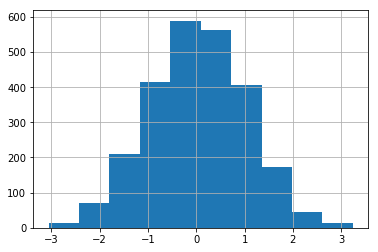

In [21]:
pd.Series(y_test).hist()

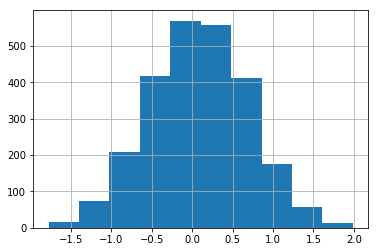

In [22]:
pd.Series(yhat).hist()

# Model 2

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y2)

In [51]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
yhat = lin_model.predict(X_test)
round(mean_squared_error(yhat, y_test))

0.0

In [52]:
lin_model.coef_

array([  1.0000e+00,   2.5000e-04])

In [53]:
nnet = MLPRegressor((10,10), activation="identity", random_state=0)
nnet.fit(X_train, y_train)
yhat = nnet.predict(X_test)
print(mean_squared_error(yhat, y_test))

0.187271834471


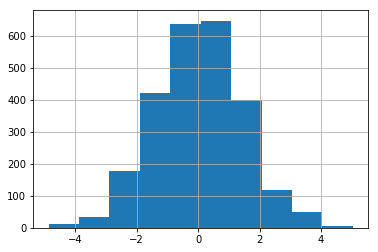

In [54]:
pd.Series(y_test).hist()

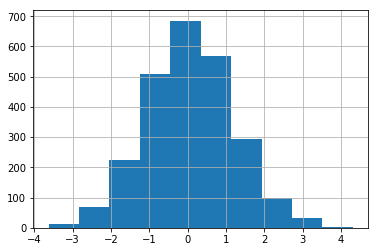

In [55]:
pd.Series(yhat).hist()

# Model 3

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y3)

In [40]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
yhat = lin_model.predict(X_test)
print(round(mean_squared_error(yhat, y_test)))
print(lin_model.coef_)

0.0
[  2.0122e+00   5.0210e-04]


In [47]:
nnet = MLPRegressor((10,10), activation="identity", random_state=0)
nnet.fit(X_train, y_train)
yhat = nnet.predict(X_test)
print(mean_squared_error(yhat, y_test))

0.448100725077


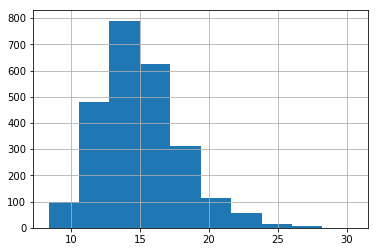

In [48]:
pd.Series(y_test).hist()

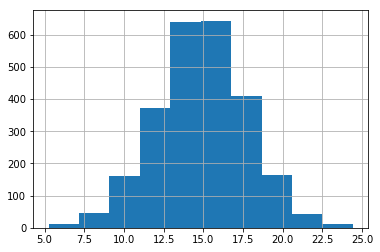

In [49]:
pd.Series(yhat).hist()